In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cpdmd import multiple_changes
from optimisation import grid_search

In [2]:
np.random.seed(42)

# data generation
sigma = 0.2
t = np.linspace(0, 2, 201)
t1 = t[:-1]
t2 = t[:-1]
dt = t[1] - t[0]
t_full = np.concatenate((t1, t1[-1] + dt + np.arange(len(t2)) * dt))
# first component
f1_pre = 2
f1_post = 4
x1_pre = np.sin(2 * np.pi * f1_pre * t1) + sigma * np.random.normal(0, 1, len(t1))
x1_post = np.sin(2 * np.pi * f1_post * t2) + sigma * np.random.normal(0, 1, len(t2))
x1 = np.concatenate((x1_pre, x1_post))
# second component
f2_pre = 3
f2_post = 1.5
x2_pre = np.sin(2 * np.pi * f2_pre * t1) + sigma * np.random.normal(0, 1, len(t1))
x2_post = np.sin(2 * np.pi * f2_post * t2) + sigma * np.random.normal(0, 1, len(t2))
x2 = np.concatenate((x2_pre, x2_post))
# combine
x = np.stack([x1, x2], axis=1)
changepoints = [len(t1)]


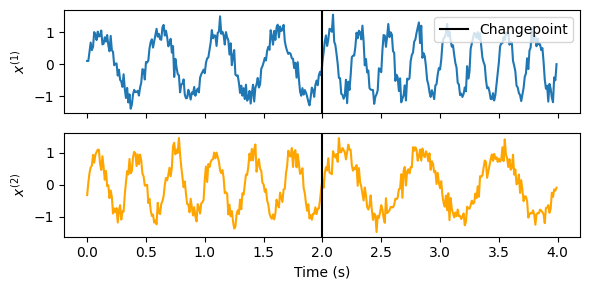

In [3]:
# plot
fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True)
axs[0].plot(t_full, x[:, 0])
axs[0].axvline(t_full[changepoints[0]], color="black", linestyle="-", label="Changepoint")
axs[0].set_ylabel("$x^{(1)}$")
axs[0].legend(loc="upper right")
axs[1].plot(t_full, x[:, 1], color="orange")
axs[1].axvline(t_full[changepoints[0]], color="black", linestyle="-")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("$x^{(2)}$")
plt.tight_layout()
plt.show()

In [4]:
# grid search of auto-adapted parameters
grid = {
    "window": [40, 60, 80],
    "order": [20, 40],
    "rank": [2, 4, 6]
}
optimiser = lambda objective, data: grid_search(objective, data, grid)

In [5]:
# cpdmd hyperparameters
burn_in = 100
gamma = 0.05
ell = 3.0

# changepoint detection
data = x.T # reshape to (num_features, sequence_length)
detections = multiple_changes(data, burn_in, gamma, ell, optimiser)

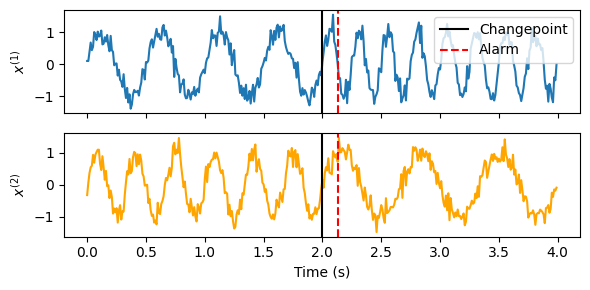

In [6]:
# plot
fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True)
axs[0].plot(t_full, x[:, 0])
axs[0].axvline(t_full[changepoints[0]], color="black", linestyle="-", label="Changepoint")
axs[0].set_ylabel("$x^{(1)}$")
axs[1].plot(t_full, x[:, 1], color="orange")
axs[1].axvline(t_full[changepoints[0]], color="black", linestyle="-")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("$x^{(2)}$")
# plot the alarms   
for i, cp in enumerate(detections):
    if i == 0:
        for ax in axs:
            ax.axvline(t_full[cp], color="red", linestyle="--", label="Alarm")
    else:
        for ax in axs:
            ax.axvline(t_full[cp], color="red", linestyle="--")
axs[0].legend(loc="upper right")
plt.tight_layout()
plt.show()